# Planning on an environment with multiple gates.

In [6]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center,gate
from panav.viz import draw_env
from panav.SAMP import Tube_Planning
from panav.util import unique_tx

import numpy as np
from matplotlib import pyplot as plt
from time import time
from tqdm import trange



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create environment

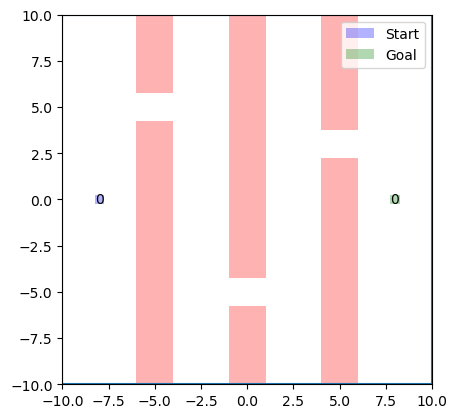

In [7]:
# 2D navigation environment

start_box_side = np.array([0.5,0.5])
goal_box_side = np.array([0.5,0.5])

top, bottom = 6,-6
start_x_offset = 7
goal_x_offset = 9
N = 3

start_locs = np.array([[-8.0,0.0]])

goal_locs = np.array([[8.0,0.0]])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]

obstacles = []


# Create a few gates for the agent to pass through
gate_width = 1.5
gate_locs = [[0,-5.0],
             [-5.0,5.0],
             [5.0,3.0]]

for x_loc,y_loc in gate_locs:
    obstacles += gate(x_loc,y_loc,gate_width,limits[1])

env = NavigationEnv(limits,obstacles,starts,goals)

bloating_r = 0.5 
ax = plt.gca()
draw_env(env,show_agent_ID=True)
plt.show()    

In [48]:
start = env.starts[0]
goal = env.goals[0]

vmax = 1.0
space_dim = 2
times = []
t0 = time()

for K in [7]:
    # print("K",K)
    results = Tube_Planning(env,start,goal,vmax,bloating_r,\
                                [],\
                                space_dim,K)
    
    t,xs = results
    times.append(time()-t0)
    # print(times)
    # t,xs = unique_tx(t,xs)
    agent_success = True

In [32]:
times

[]

In [49]:
t

array([-0.     ,  6.36396, 10.6066 , 24.04163, 28.28427, 38.89087,
       43.13351, 46.66905])

In [30]:
xs

array([[-8.5 , -8.5 , -6.5 , -6.5 , -3.5 , -3.5 , -1.5 , -1.5 , -1.5 ,
        -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 ,  1.5 ,  3.5 ,
         6.5 ,  6.5 ,  7.5 ],
       [ 0.5 ,  0.5 ,  4.75,  4.75,  4.75,  4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,  2.75,
         2.75,  2.75,  0.5 ]])

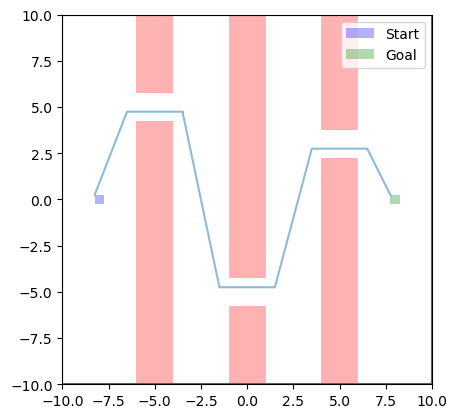

In [47]:
draw_env(env,[xs],plt.gca())